<a href="https://colab.research.google.com/github/nafidanurhidayati/PBIRakamin/blob/main/Kalbe%20Nutritionals%20Data%20Scientist/Kalbe_Nutritionals_Data_Scientist_PBI_Rakamin_by_Nafida_Nurhidayati_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Data Analytics/Kalbe Nutritionals Data Scientist Project Based Internship Program/Case Study Data Scientist

/content/drive/MyDrive/Data Analytics/Kalbe Nutritionals Data Scientist Project Based Internship Program/Case Study Data Scientist


**Import Library**

In [ ]:
#import library
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**Import Data**

In [ ]:
#Import data
dfcustomer = pd.read_csv("/content/drive/MyDrive/Data Analytics/Kalbe Nutritionals Data Scientist Project Based Internship Program/Case Study Data Scientist/Case Study - Customer.csv", sep=';')
dfproduct = pd.read_csv("/content/drive/MyDrive/Data Analytics/Kalbe Nutritionals Data Scientist Project Based Internship Program/Case Study Data Scientist/Case Study - Product.csv", sep=';')
dfstore = pd.read_csv("/content/drive/MyDrive/Data Analytics/Kalbe Nutritionals Data Scientist Project Based Internship Program/Case Study Data Scientist/Case Study - Store.csv", sep=';')
dftransaction = pd.read_csv("/content/drive/MyDrive/Data Analytics/Kalbe Nutritionals Data Scientist Project Based Internship Program/Case Study Data Scientist/Case Study - Transaction.csv", sep=';')

**Data Reading**

In [ ]:
#Mengecek nilai-nilai yang hilang
missingvalues1 = dfcustomer.isnull().sum()
missingvalues2 = dfproduct.isnull().sum()
missingvalues3 = dfstore.isnull().sum()
missingvalues4 = dftransaction.isnull().sum()

In [ ]:
#Mengecek duplikat
duplicaterows1 = dfcustomer.duplicated()
duplicaterows2 = dfproduct.duplicated()
duplicaterows3 = dfstore.duplicated()
duplicaterows4 = dftransaction.duplicated()

In [ ]:
dfcustomer.shape, dfproduct.shape, dfstore.shape, dftransaction.shape

((447, 5), (10, 3), (14, 6), (5020, 8))

In [ ]:
dfcustomer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
dfcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
dfproduct.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
dfproduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
dfstore.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
dfstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
dftransaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [ ]:
dftransaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
#data cleansing dfcustomer
dfcustomer['Income'] = dfcustomer['Income'].replace('[,]','.',regex=True).astype('float')

In [ ]:
#data cleansing dfstore
dfstore['Longitude'] = dfstore['Longitude'].replace('[,]','.',regex=True).astype('float')
dfstore['Latitude'] = dfstore['Latitude'].replace('[,]','.',regex=True).astype('float')

In [ ]:
#data cleansing dftransaction
dftransaction['Date'] = pd.to_datetime(dftransaction['Date'])

<ipython-input-19-6bd1785a4b68>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dftransaction['Date'] = pd.to_datetime(dftransaction['Date'])


In [ ]:
#Menggabungkan data
dfmerged = pd.merge(dftransaction, dfcustomer, on='CustomerID')
dfmerged = pd.merge(dfmerged, dfproduct.drop(columns=['Price']), on=['ProductID'])
dfmerged = pd.merge(dfmerged, dfstore, on=['StoreID'])
dfmerged.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
#Model mechine learning Regresi
daily_data = dfmerged.groupby(['Date']).agg({'Qty':'sum'}).reset_index()
daily_data

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [ ]:
# Setel 'Date' sebagai indeks
data = daily_data.set_index('Date')

# Lakukan resampling harian
data2 = data.resample('D').sum()

In [ ]:
data2

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [ ]:
data2.shape

(365, 1)

In [ ]:
#Memisahkan data
train_size = int(len(data2) * 0.8)
train_data, test_data = data2[:train_size], data2[train_size:]
train_data.shape, test_data.shape

((292, 1), (73, 1))

In [ ]:
train_data

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-10-15,33
2022-10-16,26
2022-10-17,53


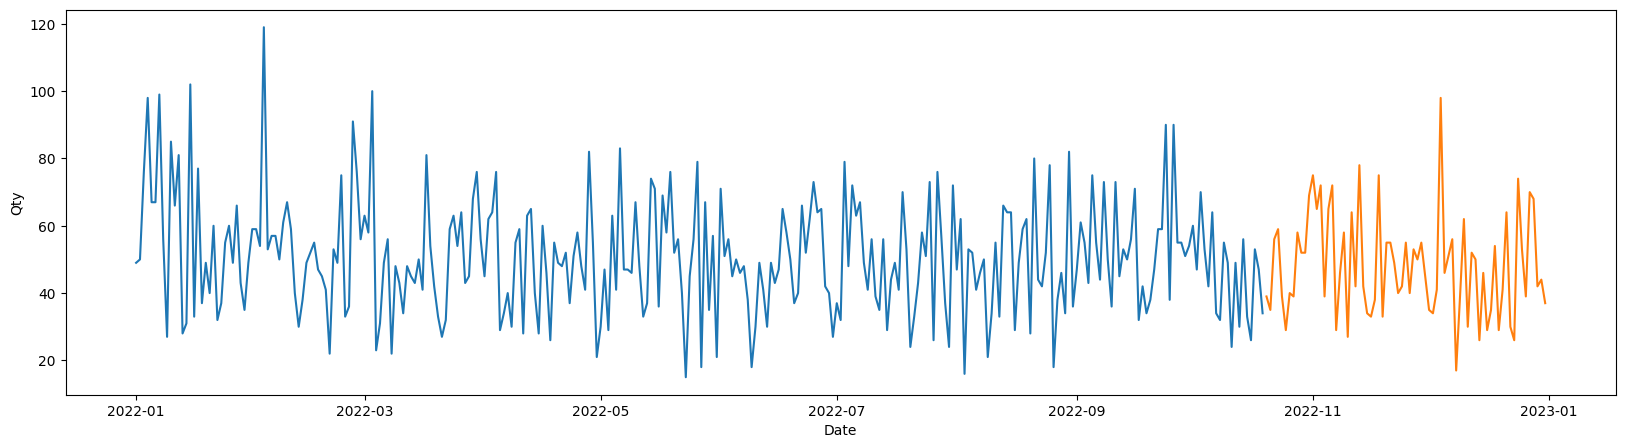

In [ ]:
#Import Library Seaborn
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

In [ ]:
#Membuat Model Prediktif dengan Model ARIMA
#Misalkan sudah memiliki data time series pelatihan dalam 'train_data'

from statsmodels.tsa.arima.model import ARIMA
#Langkah 1; Menentukan nilai p, d, dan q
p = 2 #Order of Autoregression
d = 2 #Degree of Differencing
q = 2 #Order of Moving averange

#Langkah 2; Membuat model ARIMa dengan parameter yang telah ditentukan
model = ARIMA(train_data, order=(p, d, q))

#Langkah 3; Melatih model menggunakan data latih
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
#Mean Squared Error
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

#evaluasi performa
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 236.95776973292834


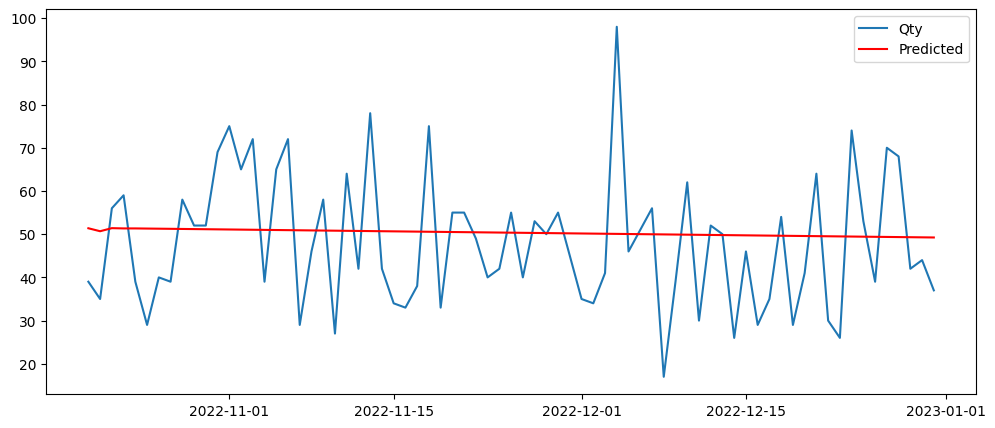

In [ ]:
#Menggambarkan Grafik Antara Nilai Kuantitas dan Nilai Prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

## **Clustering**

In [ ]:
#Mengggabungkan data berdasarkan customerID dan menghitung metrik-metrik tertentu
aggregated = dfmerged.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

aggregated

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [ ]:
 #persiapan Data untuk Clustering
 X = aggregated[['TransactionID','Qty','TotalAmount']]

In [ ]:
#Menggunakan metode clustering KMeans
from sklearn.cluster import KMeans

#Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters,random_state=42)

#Melakukan klastering pada data
aggregated['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


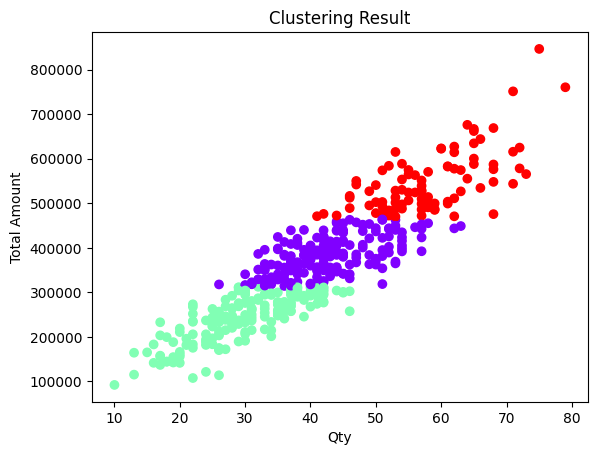

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(aggregated['Qty'],aggregated['TotalAmount'], c=aggregated['cluster'], cmap='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Result')
plt.show()

In [ ]:
#WCSS
wcss= []
for n in range (1,11):
  model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, random_state = 100)
  model1.fit(X)
  wcss.append(model1.inertia_)
print(wcss)

[6928031859602.738, 2434755241638.5283, 1233416630536.0532, 776512017046.2605, 504081360603.5857, 382121220808.0775, 277934833180.1248, 212853440612.7635, 171266010275.35165, 137780280512.4177]


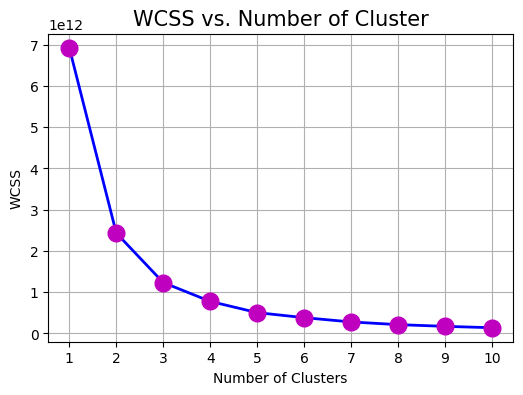

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(list(range(1, 11)), wcss, color='blue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS vs. Number of Cluster', fontsize=15)
plt.xlabel('Number of Clusters')  # Saya mengoreksi penulisan x-label
plt.ylabel('WCSS')
plt.xticks(list(range(1, 11)))
plt.grid()
plt.show()

In [ ]:
#Membuat model Clustering dengan K yang optimal
model1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter= 300, tol=0.0001, random_state=100)
model1.fit(X)
labels1=model1.labels_
centorids1 =model1.cluster_centers_

In [ ]:
#Memasukkan cluster ke dataset
aggregated['cluster'] = model1.labels_
aggregated.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,3
1,2,13,57,392300,5
2,3,15,56,446200,5
3,4,10,46,302500,6
4,5,7,27,268600,4


<Figure size 600x600 with 0 Axes>

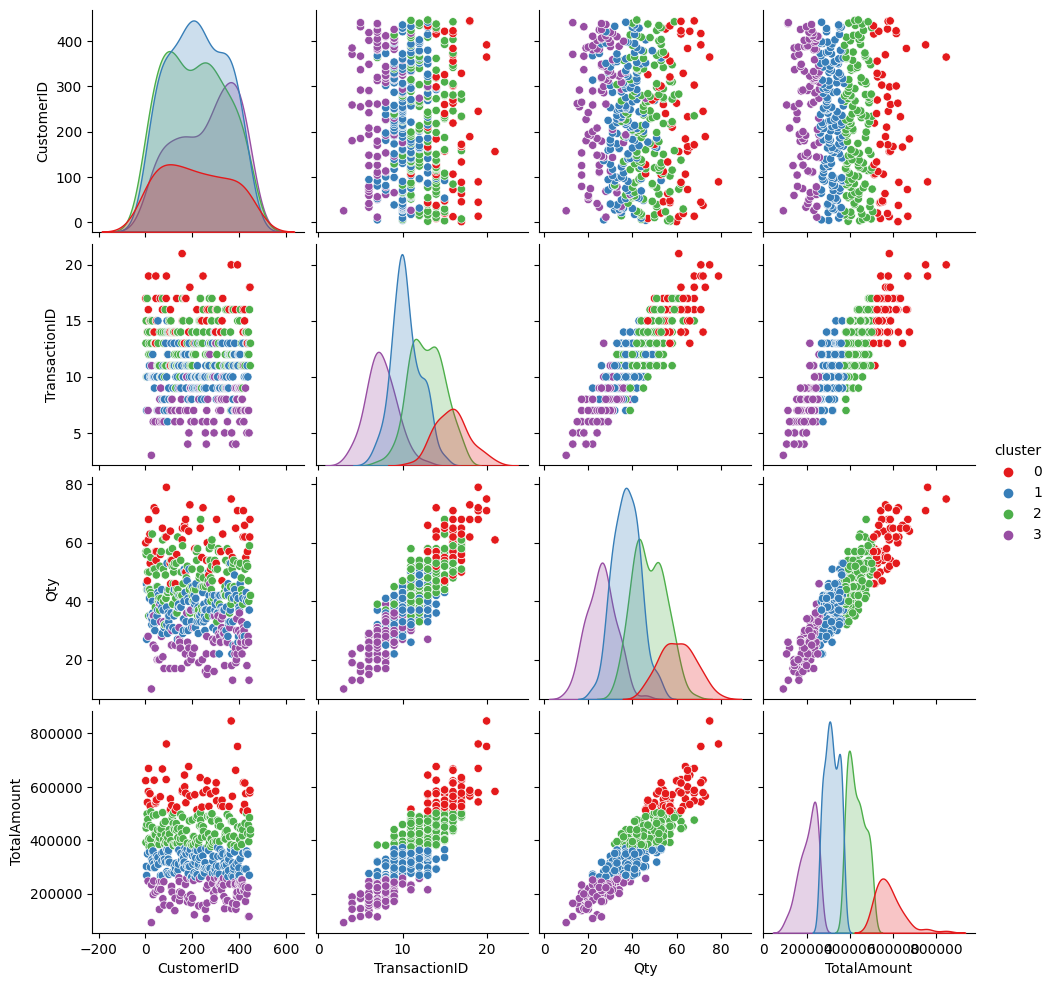

In [ ]:
plt.figure(figsize=(6,6))
sns.pairplot(data=aggregated, hue='cluster',palette='Set1')
plt.show()

In [ ]:
aggregated['CustomerID'] = aggregated['CustomerID']
aggregated_mean = aggregated.groupby('cluster').agg({
    'CustomerID':'count',
    'TransactionID':'mean',
    'Qty':'mean',
    'TotalAmount':'mean',
})
aggregated_mean.sort_values(by='CustomerID', ascending=False, inplace=True)
aggregated_mean.head()

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
1,152,10.414474,37.263158,316792.763158
2,140,12.871429,47.521429,431575.000000
3,98,7.448980,25.867347,206380.612245
0,57,15.877193,60.421053,583240.350877
